In [1]:
import numpy as np
import matplotlib.pyplot as plt


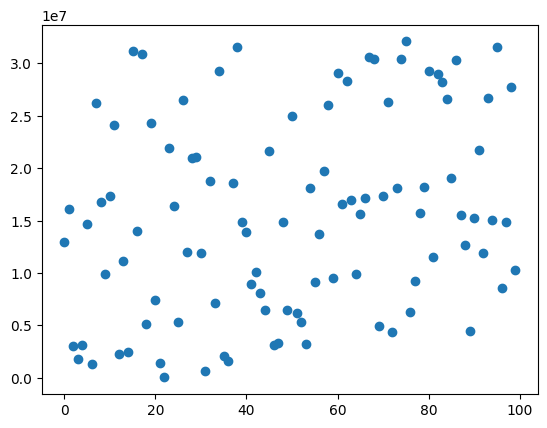

In [2]:
N = 100
a = 232134132   
c = 3423241433
m = 32124234
x = 1.5
results = []

for i in range(N):
    x = (a*x + c) % m
    results.append(x)

plt.plot(results, 'o')
plt.show()

In [3]:
import random
### Rolling Dice
def rollingtwodice(N):
    results = []
    for i in range(N):
        x = random.randrange(1, 7)
        y = random.randrange(1, 7)
        results.append([x, y])
    
    return results

### Rolling two dices millions of times: and calculating the probability of each sum
def countingProbability(N, a, b):
    results = rollingtwodice(N)
    counts = 0
    for i in results:
        if (i[0] == a and i[1] == b) or (i[0] == b and i[1] == a):
            counts += 1
    return np.round(counts/N, 8)

print(countingProbability(1000000, 6, 6))

0.027739


In [4]:
### Adding seed to random numbers:
random.seed(42)
for i in range(4):
    print(random.randrange(10))

1
0
4
3


- random(): Gives a random floating-point number uniformly
distributed in the range from zero to one, including
zero but not including one
- randrange(n): Gives a random integer from 0 to n - 1
- randrange (m, n): Gives a random integer from m to n - 1
- randrange(m,n,k): Gives a random integer in the range m to n - 1
in steps of k
1. All of these functions generate their numbers using the Mersenne twister and
they are considered good enough for serious physics calculations

Seeding the random number generator gets around this problem. It allows
you to run the program in exactly the same way two or more times in a row,
so that errors are reliably reproducible and you can work on making changes
to the program until they are fixed. Once you get everything working properly
you can get rid of the seed if you want to and then the random number
generator will generate different random numbers on every run.

### Decay of an isotope

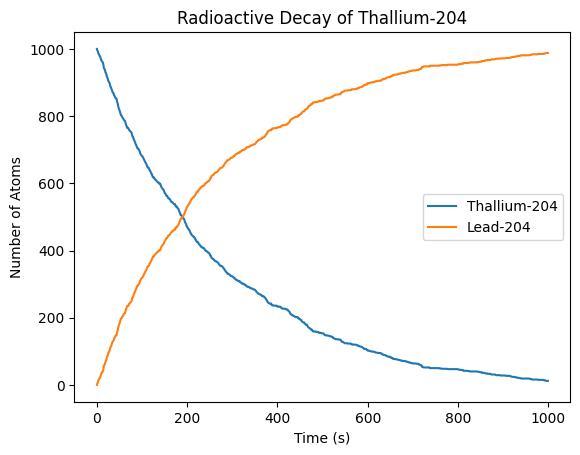

In [5]:
## constants
NT1 = 1000   ## number of thallium atoms
NPb = 0      ## Number of lead atoms
tau = 3.053 * 60   ## Half life of thallium in seconds
h = 1.0   ## size of time step in seconds
p = 1 - 2 ** (-h/tau)  ## probability of decay in one second
tmax = 1000  ## total time

## list of plot points
tpoints = np.arange(0.0, tmax, h)
T1points = []
Pbpoints = []

## main loop
for t in tpoints:
    T1points.append(NT1)
    Pbpoints.append(NPb)
    
    decay = 0
    for i in range(NT1):
        if random.random() < p:
            decay += 1
    NT1 -= decay
    NPb += decay
    
## Make graph
plt.plot(tpoints, T1points, label='Thallium-204')
plt.plot(tpoints, Pbpoints, label='Lead-204')
plt.xlabel('Time (s)')
plt.ylabel('Number of Atoms')
plt.title('Radioactive Decay of Thallium-204')
plt.legend()
plt.show()

### Radioactive decay Chain (Advance Queestion)

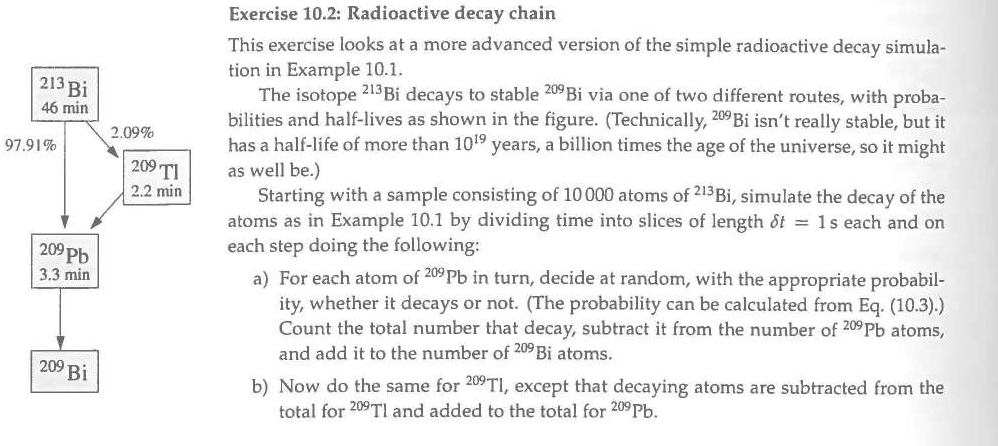

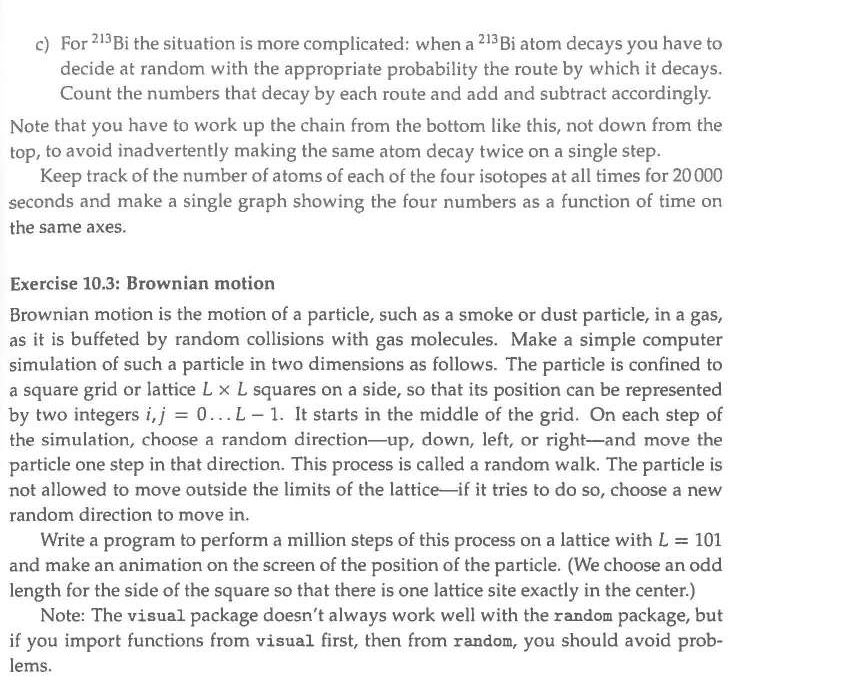

In [8]:
def monte_carlo_decay(n_nuclei, t_max):
    ## Decay Constants 
    half_lives = {
        '213Bi': 46,
        '209Pb': 3.3,
        '209Tl': 2.2
    }
    decay_constants = {key: np.log(2) / value for key, value in half_lives.items()}
    
    ## Probabilities for decay constants
    bi_to_pb_prob = 0.9791
    bi_to_tl_prob = 0.0209
    
    ## Initialize nuclei counts
    nuclei = {'213Bi': n_nuclei, '209Pb': 0, '209Tl': 0, '209Bi': 0}
    
    ## time_tracking
    time_steps= np.arange(0, t_max, 0.1)   
    results = {key : [] for key in nuclei.keys()}
    
    for t in time_steps:
        ## Record current counts
        for key in nuclei.keys():
            results[key].append(nuclei[key])
        
        ## Decay events for 213Bi
        decayed_bi = np.random.binomial(nuclei['213Bi'], 1 - np.exp(-decay_constants['213Bi'] * 0.1))
        decayed_to_pb = np.random.binomial(decayed_bi, bi_to_pb_prob)
        decayed_to_tl = decayed_bi - decayed_to_pb
        
        nuclei["213Bi"] -= decayed_bi
        nuclei["209Pb"] += decayed_to_pb
        nuclei["209Tl"] += decayed_to_tl
        
         # Decay events for 209Pb
        decayed_pb = np.random.binomial(nuclei["209Pb"], 1 - np.exp(-decay_constants["209Pb"] * 0.1))
        nuclei["209Pb"] -= decayed_pb
        nuclei["209Bi"] += decayed_pb

        # Decay events for 209Tl
        decayed_tl = np.random.binomial(nuclei["209Tl"], 1 - np.exp(-decay_constants["209Tl"] * 0.1))
        nuclei["209Tl"] -= decayed_tl
        nuclei["209Bi"] += decayed_tl
        
        # Convert results to arrays
    for key in results.keys():
        results[key] = np.array(results[key])

    return time_steps, results




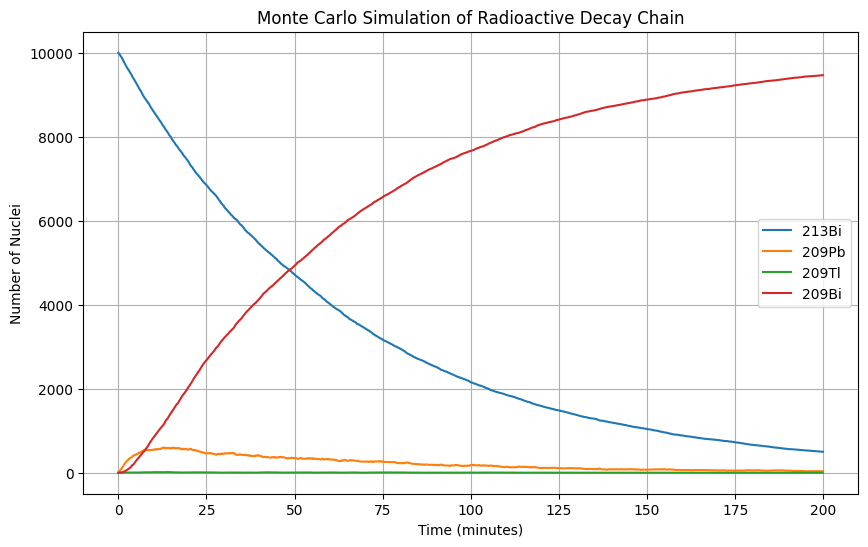

In [9]:
# Parameters
n_nuclei = 10000  # Initial number of 213Bi nuclei
t_max = 200  # Simulation time in minutes

# Run simulation
time_steps, results = monte_carlo_decay(n_nuclei, t_max)

# Plot results
plt.figure(figsize=(10, 6))
for key, values in results.items():
    plt.plot(time_steps, values, label=key)

plt.title("Monte Carlo Simulation of Radioactive Decay Chain")
plt.xlabel("Time (minutes)")
plt.ylabel("Number of Nuclei")
plt.legend()
plt.grid()
plt.show()


#### Non-Uniform Random Distribution :
- In this case, the random distribution is not uniform. The random distribution is a non-uniform distribution. The non uniform distribution is a distribution where the probability of each outcome is not the same.
- For example, consider a random variable X that can take values 1, 2, 3 , 4, 5 with probabilities 0.1, 0.2, 0 .3, 0.2, 0.2 respectively. This is a non-uniform distribution.
- In this case, the probability of each outcome is not the same. The probability of outcome 1

1. Classic Example is above radioactive decay with probability distribution exponential

In [ ]:
## Approach 2: (More Faster Approach)
## We will use converting non-uniform to uniform using standard approach we discuss till now

## constants
NT1 = 1000   ## number of thallium atoms
NPb = 0      ## Number of lead atoms
tau = 3.053 * 60   ## Half life of thallium in seconds
h = 1.0   ## size of time step in seconds
p = 1 - 2 ** (-h/tau)  ## probability of decay in one second
tmax = 1000  ## total time

## list of plot points
tpoints = np.arange(0.0, tmax, h)
T1points = []
Pbpoints = []

## main loop
for t in tpoints:
    T1points.append(NT1)
    Pbpoints.append(NPb)
    
    decay = 0
    for i in range(NT1):
        if random.random() < p:
            decay += 1
    NT1 -= decay
    NPb += decay
    
## Make graph
plt.plot(tpoints, T1points, label='Thallium-204')
plt.plot(tpoints, Pbpoints, label='Lead-204')
plt.xlabel('Time (s)')
plt.ylabel('Number of Atoms')
plt.title('Radioactive Decay of Thallium-204')
plt.legend()
plt.show()

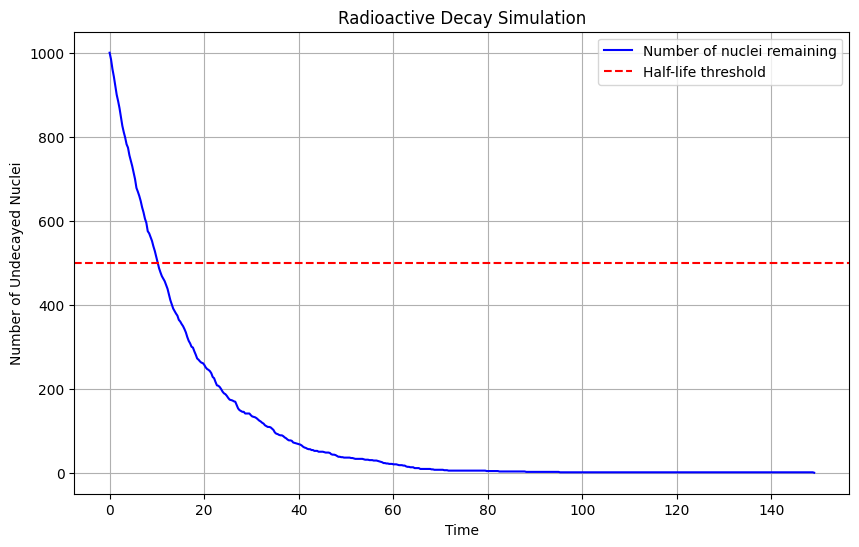

In [12]:
# Parameters
N_initial = 1000  # Initial number of nuclei
T_half = 10  # Half-life in arbitrary time units
lambda_decay = np.log(2) / T_half  # Decay constant

# Generate non-uniform random decay times
uniform_random_numbers = np.random.uniform(0, 1, N_initial)
decay_times = -np.log(1 - uniform_random_numbers) / lambda_decay

# Sort decay times for visualization
decay_times_sorted = np.sort(decay_times)

# Simulate number of nuclei remaining over time
time_steps = np.linspace(0, max(decay_times_sorted), 500)
n_remaining = [np.sum(decay_times_sorted > t) for t in time_steps]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time_steps, n_remaining, label="Number of nuclei remaining", color='blue')
plt.axhline(N_initial / 2, color='red', linestyle='--', label="Half-life threshold")
plt.title("Radioactive Decay Simulation")
plt.xlabel("Time")
plt.ylabel("Number of Undecayed Nuclei")
plt.legend()
plt.grid()
plt.show()
